---

# <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [2]:
#Importing the dataset

df = pd.read_csv('default_data.csv')
df.drop(['ID','year'],axis=1, inplace=True)

target = 'Status'
labels = ['Defaulter','Not-Defaulter']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,Secured_by,total_units,income,Credit_Score,age,LTV,Region,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,home,1U,1740.0,758,25-34,98.728814,south,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,home,1U,4980.0,552,55-64,NaN,North,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,home,1U,9480.0,834,35-44,80.019685,south,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,home,1U,11880.0,587,45-54,69.376900,North,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,home,1U,10440.0,602,25-34,91.886544,North,0



Inference: The Datset consists of 24 features & 148670 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              145326 non-null  object 
 1   Gender                  148670 non-null  object 
 2   approv_in_adv           147762 non-null  object 
 3   loan_type               148670 non-null  object 
 4   loan_purpose            148536 non-null  object 
 5   Credit_Worthiness       148670 non-null  object 
 6   open_credit             148670 non-null  object 
 7   business_or_commercial  148670 non-null  object 
 8   loan_amount             148670 non-null  int64  
 9   rate_of_interest        112231 non-null  float64
 10  Upfront_charges         109028 non-null  float64
 11  term                    148629 non-null  float64
 12  Neg_ammortization       148549 non-null  object 
 13  interest_only           148670 non-null  object 
 14  lump_sum_payment    

In [4]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

loan_limit                    2
Secured_by                    2
lump_sum_payment              2
interest_only                 2
Neg_ammortization             2
business_or_commercial        2
Status                        2
Credit_Worthiness             2
approv_in_adv                 2
open_credit                   2
loan_type                     3
total_units                   4
Gender                        4
Region                        4
loan_purpose                  4
age                           7
term                         26
rate_of_interest            131
loan_amount                 211
property_value              385
Credit_Score                401
income                     1001
LTV                        8484
Upfront_charges           58271
dtype: int64

In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 8 numerical & 15 categorical features.


In [6]:
#Checking the stats of all the columns

display(df.describe())

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,1.486700e+05,112231.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,3.311177e+05,4.045476,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,1.839093e+05,0.561391,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,1.650000e+04,0.000000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,1.965000e+05,3.625000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,2.965000e+05,3.990000,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,4.365000e+05,4.375000,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,3.576500e+06,8.000000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

# <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


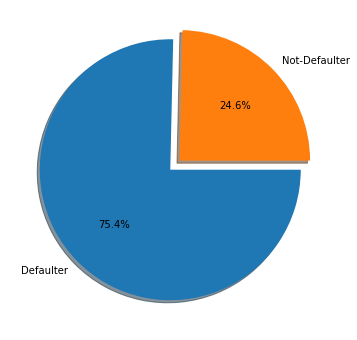

In [7]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(sorted(df[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

                               Visualising Categorical Features:                                


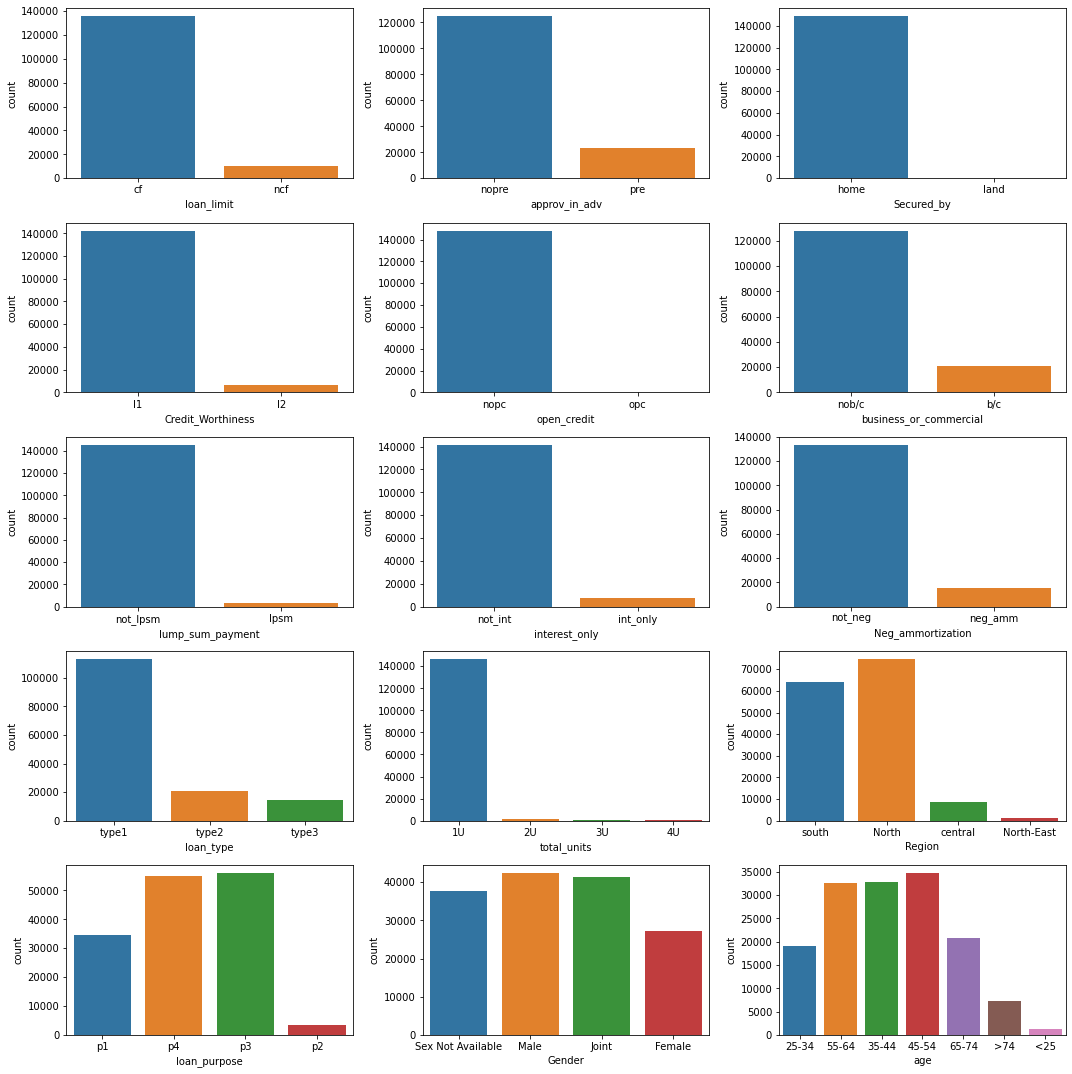

In [8]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

**Inference:** Visualizing the categorical features reveal lot of information about the dataset.

                                     Features Distribution                                      


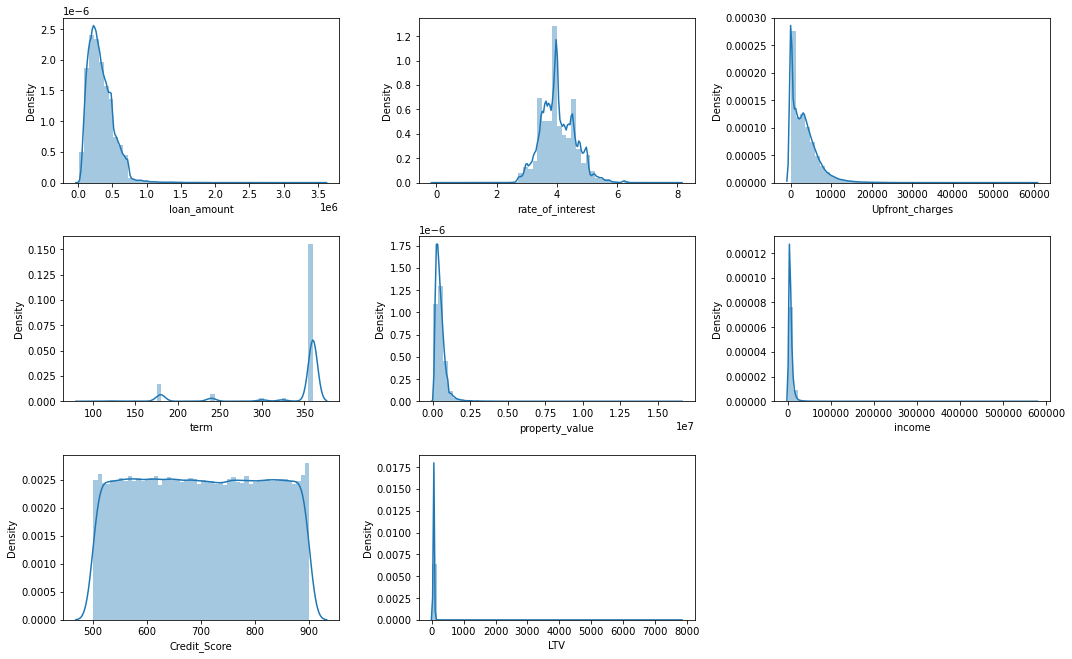

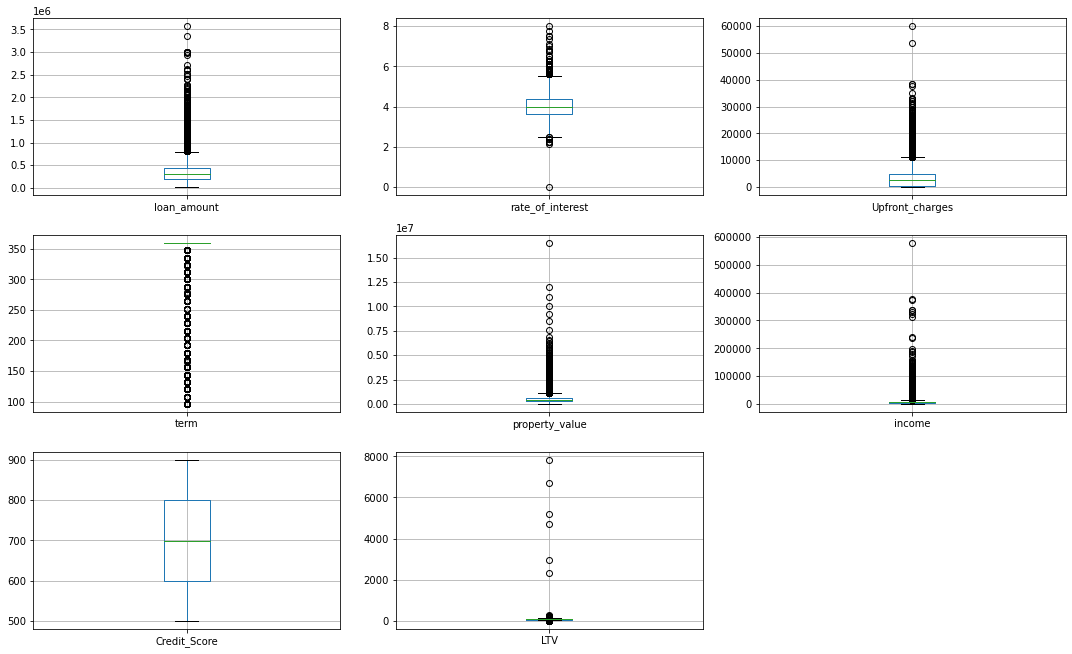

In [9]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

In [10]:
# #Understanding the relationship between all the features

# try:
#     g=sns.pairplot(df1, hue=target, size=4)
#     g.map_upper(sns.kdeplot, levels=1, color=".2")
#     plt.show()
# except:
#     pass

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

# <center> 3. Data Preprocessing

In [11]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 1


In [12]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                        Total Null Values  Percentage
Status                                  0         0.0
Gender                                  0         0.0
Credit_Score                            0         0.0
loan_type                               0         0.0
total_units                             0         0.0
Credit_Worthiness                       0         0.0
open_credit                             0         0.0
business_or_commercial                  0         0.0
loan_amount                             0         0.0
Secured_by                              0         0.0
lump_sum_payment                        0         0.0
Region                                  0         0.0
interest_only                           0         0.0
term                                   41         0.0
Neg_ammortization                     121         0.1
loan_purpose                          134         0.1
age                                   200         0.1
approv_in_adv               

**Inference:** There are many outliers in the dataset. Let us try to impute the missing values

In [13]:
from sklearn.impute import SimpleImputer

for i in nf:
    SI = SimpleImputer(strategy='mean')
    df[i] = SI.fit_transform(df[[i]])
    
for i in cf:
    SI = SimpleImputer(strategy='most_frequent')
    df[i] = SI.fit_transform(df[[i]])

In [14]:
#Converting categorical Columns to Numeric

df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

#Target Variable
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e]=i
df1[target]=df1[target].map(MAP)
print('Mapping Target variable --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

Mapping Target variable ---> {1: 0, 0: 1}

One-Hot Encoding on features:
Secured_by
Credit_Worthiness
open_credit
business_or_commercial
lump_sum_payment
interest_only

Dummy Encoding on features:
loan_type
total_units
Region
Gender


(148670, 21)

In [15]:
#Removal of outlier:

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.20)
        Q3 = df4[i].quantile(0.80)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,interest_only,lump_sum_payment,Secured_by,Credit_Score,Status,loan_type_type2,loan_type_type3,total_units_2U,total_units_3U,total_units_4U,Region_North-East,Region_central,Region_south,Gender_Joint,Gender_Male,Gender_Sex Not Available
0,0,0,1,116500.0,360.0,1,1,0,758.0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,206500.0,360.0,1,0,0,552.0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,1,406500.0,360.0,1,1,0,834.0,1,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,456500.0,360.0,1,1,0,587.0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,696500.0,360.0,1,1,0,602.0,1,0,0,0,0,0,0,0,0,1,0,0



Inference: Before removal of outliers, The dataset had 148670 samples.
Inference: After removal of outliers, The dataset now has 120695 samples.


In [16]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
1    91699
0    28996
Name: Status, dtype: int64

Class distribution after applying SMOTE Technique:
0    91699
1    91699
Name: Status, dtype: int64


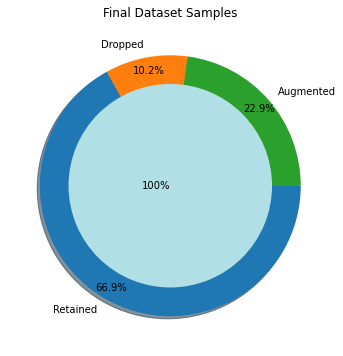


Inference:The final dataset after cleanup has 183398 samples & 21 columns.


In [17]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

---

# <center> 4. Data Manipulation

In [18]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (183398, 20) (183398,) 
Training set  --->  (146718, 20) (146718,) 
Testing set   --->  (36680, 20)  (36680,)


In [19]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,interest_only,lump_sum_payment,Secured_by,Credit_Score,loan_type_type2,loan_type_type3,total_units_2U,total_units_3U,total_units_4U,Region_North-East,Region_central,Region_south,Gender_Joint,Gender_Male,Gender_Sex Not Available
count,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,146718.0,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05,1.467180e+05
mean,-2.712032e-18,-5.859927e-18,-1.495492e-16,-1.457717e-17,0.0,-4.896187e-17,5.719482e-17,-1.017012e-18,1.597193e-16,4.327144e-17,-4.930087e-17,7.748663e-19,9.734258e-18,1.912951e-17,6.780080e-18,1.946852e-17,2.702346e-17,-9.247545e-17,7.458088e-17,1.380231e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.0,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.573994e-01,-5.427949e-02,-1.918566e+00,-1.832383e+00,0.0,-3.895205e+00,-3.929952e+00,-1.305465e-02,-1.719056e+00,-3.808355e-01,-2.891598e-01,-8.477871e-02,-4.213375e-02,-3.776948e-02,-7.487710e-02,-2.087234e-01,-7.469689e-01,-5.153282e-01,-5.427787e-01,-4.926020e-01
25%,-1.573994e-01,-5.427949e-02,5.212226e-01,-7.417674e-01,0.0,2.567259e-01,2.544561e-01,-1.305465e-02,-8.662439e-01,-3.808355e-01,-2.891598e-01,-8.477871e-02,-4.213375e-02,-3.776948e-02,-7.487710e-02,-2.087234e-01,-7.469689e-01,-5.153282e-01,-5.427787e-01,-4.926020e-01
50%,-1.573994e-01,-5.427949e-02,5.212226e-01,-1.530663e-01,0.0,2.567259e-01,2.544561e-01,-1.305465e-02,-4.817457e-03,-3.808355e-01,-2.891598e-01,-8.477871e-02,-4.213375e-02,-3.776948e-02,-7.487710e-02,-2.087234e-01,-7.469689e-01,-5.153282e-01,-5.427787e-01,-4.926020e-01
75%,-1.573994e-01,-5.427949e-02,5.212226e-01,6.711153e-01,0.0,2.567259e-01,2.544561e-01,-1.305465e-02,8.689663e-01,-3.808355e-01,-2.891598e-01,-8.477871e-02,-4.213375e-02,-3.776948e-02,-7.487710e-02,-2.087234e-01,1.338744e+00,-5.153282e-01,-5.427787e-01,-4.926020e-01
max,6.353264e+00,1.842316e+01,5.212226e-01,3.496881e+00,0.0,2.567259e-01,2.544561e-01,7.660104e+01,1.726650e+00,2.625806e+00,3.458296e+00,1.179541e+01,2.373394e+01,2.647640e+01,1.335522e+01,4.791029e+00,1.338744e+00,1.940511e+00,1.842372e+00,2.030036e+00



                                Standardardization on Testing set                                


,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,interest_only,lump_sum_payment,Secured_by,Credit_Score,loan_type_type2,loan_type_type3,total_units_2U,total_units_3U,total_units_4U,Region_North-East,Region_central,Region_south,Gender_Joint,Gender_Male,Gender_Sex Not Available
count,36680.000000,36680.000000,36680.000000,36680.000000,36680.0,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000,36680.000000
mean,0.003060,0.004155,-0.006977,-0.007917,0.0,-0.005769,-0.004731,-0.008877,0.002505,0.008929,0.014887,0.001051,-0.006483,-0.002350,-0.002747,0.000372,0.001681,-0.005882,-0.006965,-0.001073
std,1.009443,1.037467,1.004852,0.995795,0.0,1.010439,1.008659,0.565722,1.000604,1.009948,1.023223,1.006151,0.919998,0.968450,0.981599,1.000866,1.000510,0.995796,0.995453,0.999188
min,-0.157399,-0.054279,-1.918566,-1.860299,0.0,-3.895205,-3.929952,-0.013055,-1.719056,-0.380835,-0.289160,-0.084779,-0.042134,-0.037769,-0.074877,-0.208723,-0.746969,-0.515328,-0.542779,-0.492602
25%,-0.157399,-0.054279,0.521223,-0.800637,0.0,0.256726,0.254456,-0.013055,-0.861936,-0.380835,-0.289160,-0.084779,-0.042134,-0.037769,-0.074877,-0.208723,-0.746969,-0.515328,-0.542779,-0.492602
50%,-0.157399,-0.054279,0.521223,-0.153066,0.0,0.256726,0.254456,-0.013055,0.003797,-0.380835,-0.289160,-0.084779,-0.042134,-0.037769,-0.074877,-0.208723,-0.746969,-0.515328,-0.542779,-0.492602
75%,-0.157399,-0.054279,0.521223,0.671115,0.0,0.256726,0.254456,-0.013055,0.873248,-0.380835,-0.289160,-0.084779,-0.042134,-0.037769,-0.074877,-0.208723,1.338744,-0.515328,-0.542779,-0.492602
max,6.353264,18.423165,0.521223,3.496881,0.0,0.256726,0.254456,76.601044,1.726650,2.625806,3.458296,11.795415,23.733942,26.476405,13.355218,4.791029,1.338744,1.940511,1.842372,2.030036


---

# <center> 5. Feature Selection/Extraction

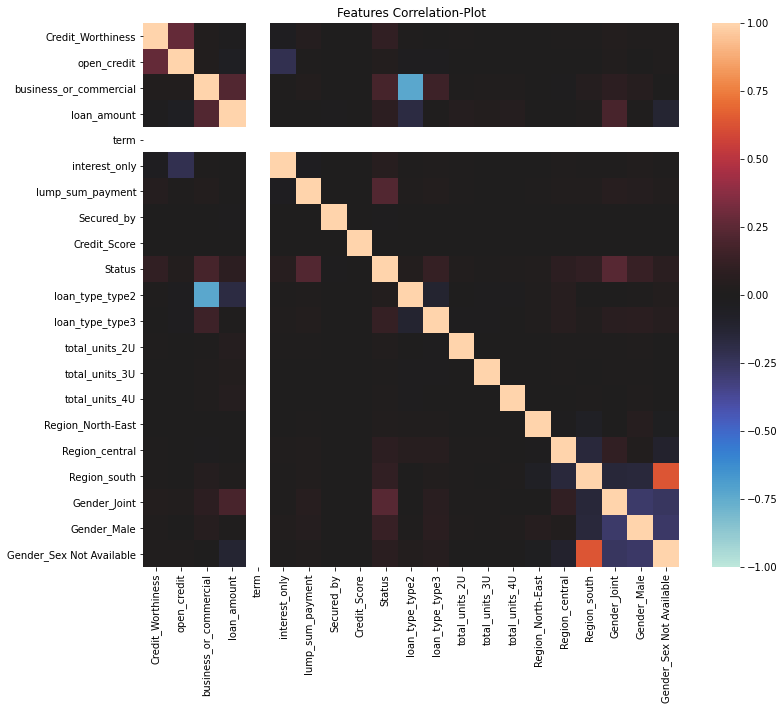

In [20]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

# <center> 6. Predictive Modeling

In [22]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0


In [23]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*25,Evaluation_Results.index[i], '-'*25,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<------------------------- Evaluating Logistic Regression (LR) ------------------------->>>

Accuracy = 72.7%
F1 Score = 72.5%

 Confusiton Matrix:
 [[11882  6579]
 [ 3446 14773]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70     18461
           1       0.69      0.81      0.75     18219

    accuracy                           0.73     36680
   macro avg       0.73      0.73      0.72     36680
weighted avg       0.73      0.73      0.72     36680



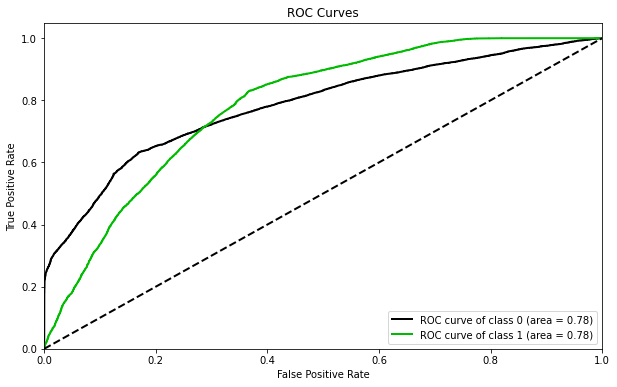


Interpreting the Output of Logistic Regression:

intercept  -0.6370003724354577
classes [0 1]


,coeff
Credit_Worthiness,0.169675
open_credit,0.041099
business_or_commercial,3.426400
loan_amount,0.023306
term,0.000000
interest_only,0.123665
lump_sum_payment,0.673479
Secured_by,-0.144580
Credit_Score,-0.007825
loan_type_type2,2.773987


In [24]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = LR_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<------------------------- Evaluating Decision Tree Classifier (DT) ------------------------->>>

Accuracy = 72.39999999999999%
F1 Score = 72.39999999999999%

 Confusiton Matrix:
 [[13911  4550]
 [ 5573 12646]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73     18461
           1       0.74      0.69      0.71     18219

    accuracy                           0.72     36680
   macro avg       0.72      0.72      0.72     36680
weighted avg       0.72      0.72      0.72     36680



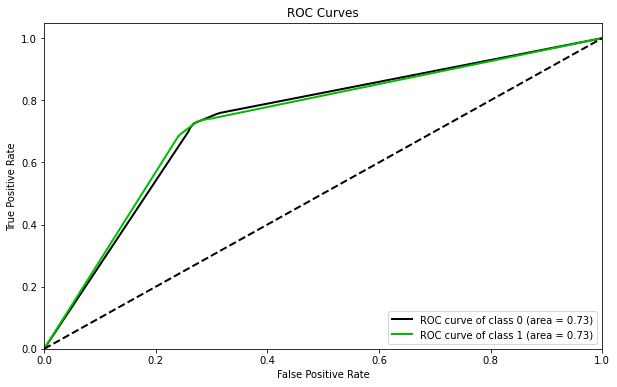

In [27]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = DT_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)



---

## 3. Random Forest Classfier:

<<<------------------------- Evaluating Random Forest Classifier (RF) ------------------------->>>

Accuracy = 74.6%
F1 Score = 74.6%

 Confusiton Matrix:
 [[13813  4648]
 [ 4683 13536]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     18461
           1       0.74      0.74      0.74     18219

    accuracy                           0.75     36680
   macro avg       0.75      0.75      0.75     36680
weighted avg       0.75      0.75      0.75     36680



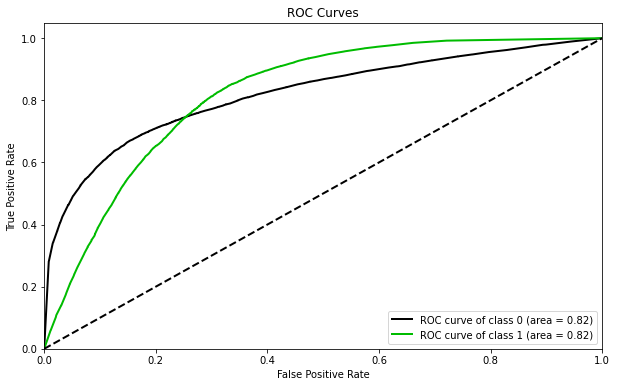


Interpreting the output of Random Forest:



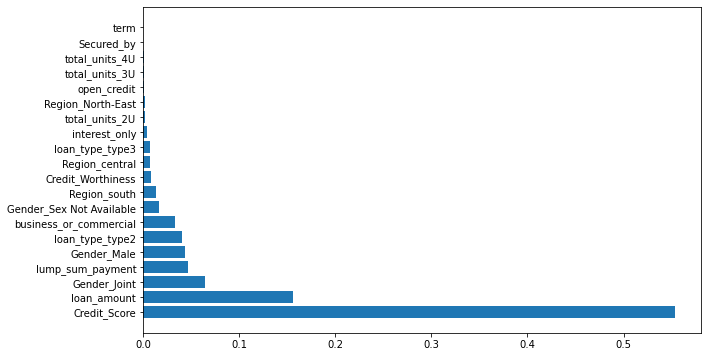

In [28]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RF_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<------------------------- Evaluating Naïve Bayes Classifier (NB) ------------------------->>>

Accuracy = 70.8%
F1 Score = 70.7%

 Confusiton Matrix:
 [[12056  6405]
 [ 4310 13909]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69     18461
           1       0.68      0.76      0.72     18219

    accuracy                           0.71     36680
   macro avg       0.71      0.71      0.71     36680
weighted avg       0.71      0.71      0.71     36680



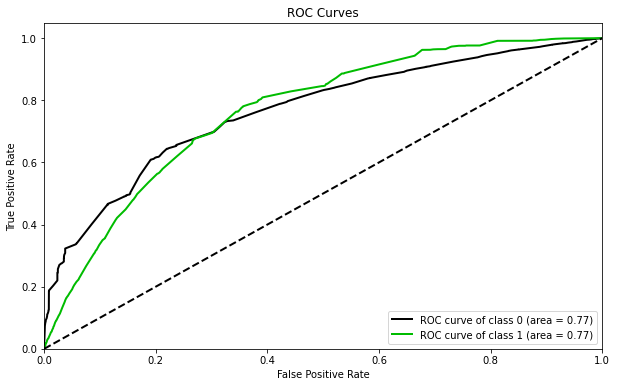

In [29]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = NB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

In [30]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

NameError: name 'SVM' is not defined

                                    ML Algorithms Comparison                                    


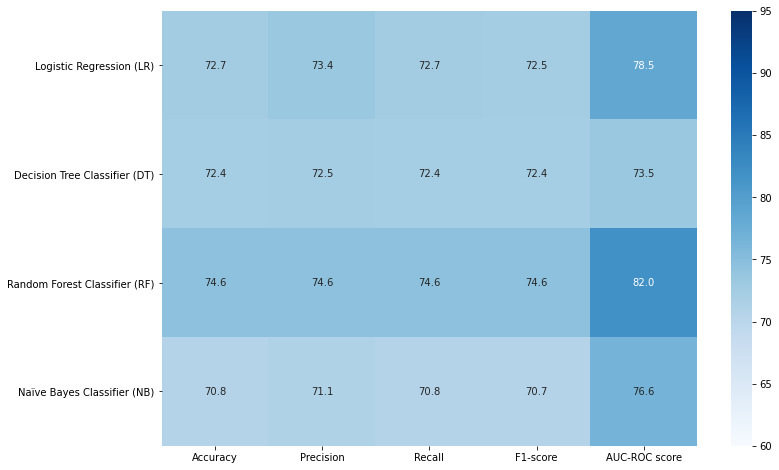

In [31]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=60, vmax=95, cmap='Blues', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1-score. We can note from the above heatmap that the Boosting & RandomForest Models Performed well on the current dataset...

---

# <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was large enough summing around 1.5 lakh samples & after preprocessing 31.8% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 15.5% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The SVM, Boosting & Random Forest Classifier performed exceptionally well on the current dataset, considering F1-score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

In [ ]:
#<<<---------------------------------------------THE END----------------------------------------------------------------->>>